# Introduction

Employee attrition is very important. New employees can spend time and money which could be reallocated by the company. Therefore, understanding why employees leave is very important for businesses to maximize efficiency and reduce training cost which translates into greater profit.

**Through this analysis, we would like to come up with the best possible classifications which could be used to predict if a certain employee is going to leave.**

## Getting the data

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../Input/HR_comma_sep.csv')

In [51]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [52]:
df.shape

(14999, 10)

## Cleaning Data

In [53]:
#Map salary to 0,1,2
df.salary = df.salary.map({'low':0,'medium':1,'high':2})

In [54]:
#Generate X and y
X = df.drop(['left','sales'],1)
y = df['left']

## Training the model

In [55]:
import numpy as np
from sklearn import preprocessing,cross_validation,neighbors,svm

In [56]:
#splitting the train and test sets
X_train, X_test, y_train,y_test= cross_validation.train_test_split(X,y,test_size=0.2)

## SVM Model Train

In [57]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
pd.DataFrame(X_train,y_train).head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
left,,,,,,,,
0,0.38,0.53,2,157,3,0,0,0
0,0.38,0.53,2,157,3,0,0,0
0,0.38,0.53,2,157,3,0,0,0
1,0.80,0.86,5,262,6,0,0,1
0,0.38,0.53,2,157,3,0,0,0


In [59]:
accuracy = clf.score(X_test,y_test)

In [60]:
print(accuracy)

0.96


In [61]:
pd.DataFrame(clf.predict(X_test),y_test,columns=['ytest']).head()

,ytest
left,
0,0
0,0
0,0
0,0
0,0


## Training Multiple Classifiers and Test Them

In [62]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 95.1667%
Log Loss: 0.754944713284
SVC
****Results****
Accuracy: 87.5333%
Log Loss: 0.276587161633
DecisionTreeClassifier
****Results****
Accuracy: 98.2000%
Log Loss: 0.621697975108
RandomForestClassifier
****Results****
Accuracy: 99.0333%
Log Loss: 0.144614022465
AdaBoostClassifier
****Results****
Accuracy: 96.3333%
Log Loss: 0.58271816407
GradientBoostingClassifier
****Results****
Accuracy: 97.5667%
Log Loss: 0.0929671322286
GaussianNB
****Results****
Accuracy: 80.5333%
Log Loss: 0.484821165725
LinearDiscriminantAnalysis
****Results****
Accuracy: 77.4667%
Log Loss: 0.427552787456
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 91.5000%
Log Loss: 0.308445408378


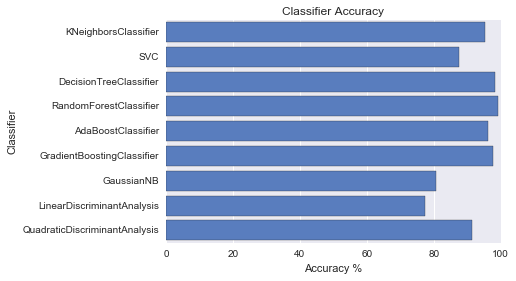

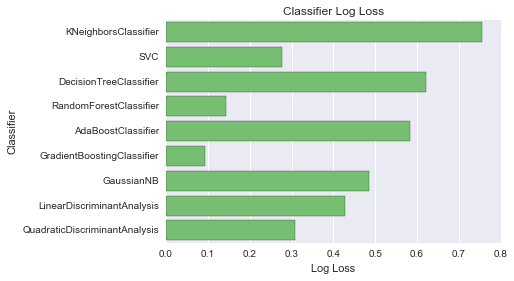

In [63]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [64]:
# Predict Test Set
favorite_clf = DecisionTreeClassifier()
favorite_clf.fit(X_train, y_train)
submission = pd.DataFrame(favorite_clf.predict(X_test))

In [2]:
# Export Submission
submission.to_csv('../Output/submission.csv', index = False)
submission.tail()

NameError: name 'testdf' is not defined

**So from here we can tell get the prediction of Decision Tree or RandomForest and use it to predict future data**

In [4]:
import os
os.getcwd()

'D:\\Anaconda\\Scripts\\python notebook\\Kaggle\\HR Analytics\\Notebook'